### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Information

### Data preprocessing

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.set_index('id', inplace=True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### EDA - Exploratory Data Analysis

In [10]:
df.groupby('cut').size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

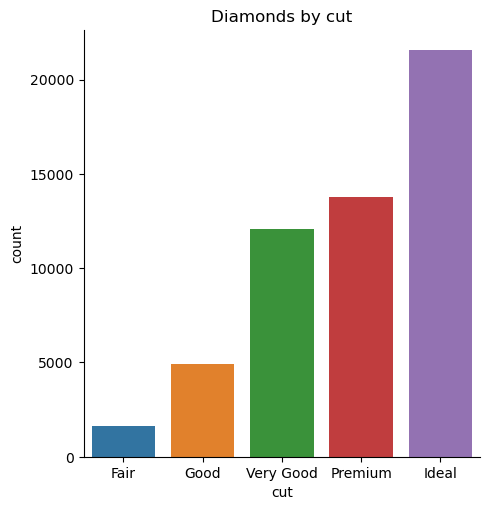

In [11]:
category_lst = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
sns.catplot(data=df, x='cut', kind='count', order=category_lst)
plt.title('Diamonds by cut')
plt.show()

In [12]:
df.groupby(['cut', 'color']).size()

cut        color
Fair       D         163
           E         224
           F         312
           G         314
           H         303
           I         175
           J         119
Good       D         662
           E         933
           F         909
           G         871
           H         702
           I         522
           J         307
Ideal      D        2834
           E        3903
           F        3826
           G        4884
           H        3115
           I        2093
           J         896
Premium    D        1603
           E        2337
           F        2331
           G        2924
           H        2360
           I        1428
           J         808
Very Good  D        1513
           E        2400
           F        2164
           G        2299
           H        1824
           I        1204
           J         678
dtype: int64

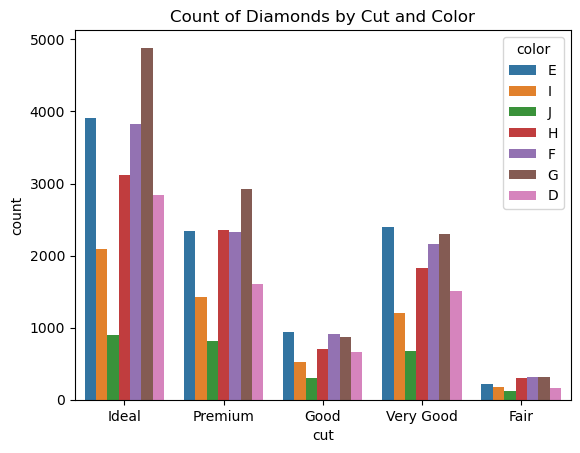

In [13]:
sns.countplot(data=df, x='cut', hue='color')
plt.title("Count of Diamonds by Cut and Color")
plt.show()

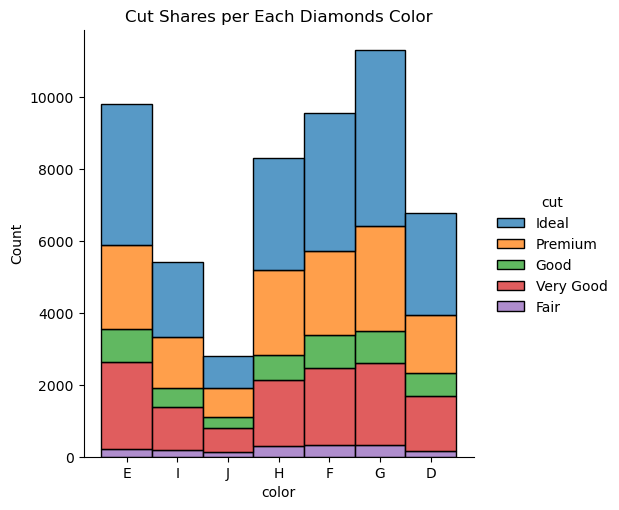

In [14]:
sns.displot(data=df, x='color', hue='cut', multiple='stack', binwidth=2)
plt.title('Cut Shares per Each Diamonds Color')
plt.show()

In [15]:
df.groupby('clarity')['price'].agg('mean')

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64

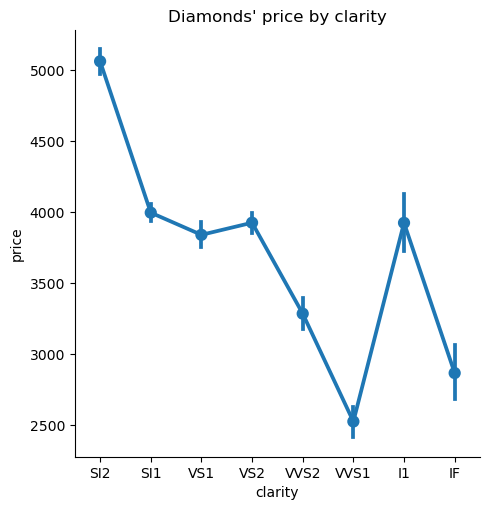

In [16]:
sns.catplot(data=df, x='clarity', y='price', kind='point')
plt.title("Diamonds' price by clarity")
plt.show()

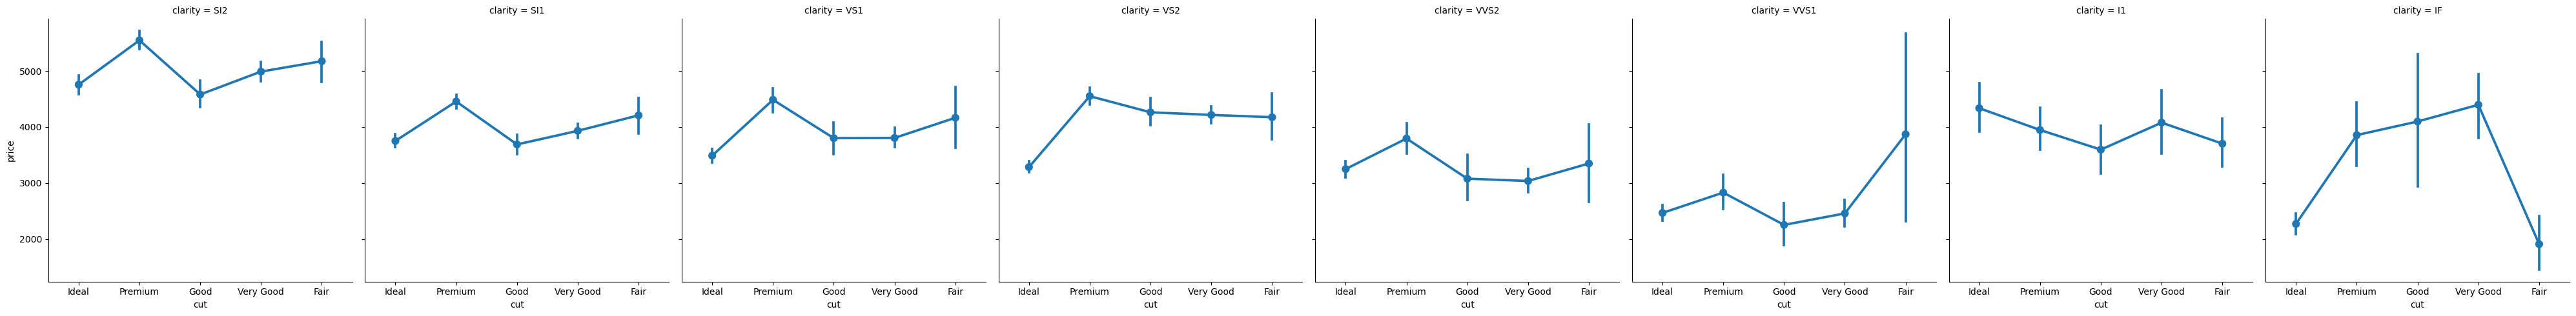

In [17]:
sns.catplot(data=df, x='cut', y='price', kind='point', col='clarity')
plt.tight_layout()
plt.show()

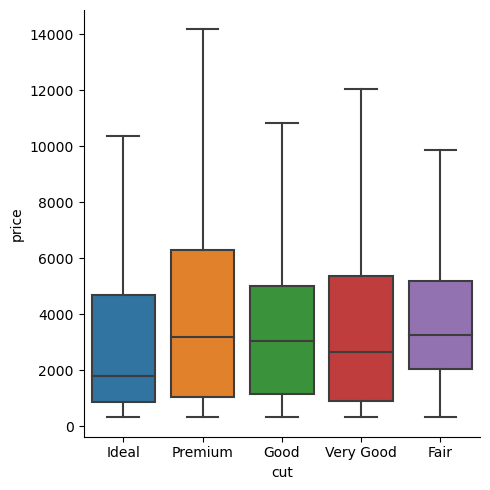

In [18]:
sns.catplot(data=df, x='cut', y='price', kind='box', sym='')
plt.show()

In [19]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


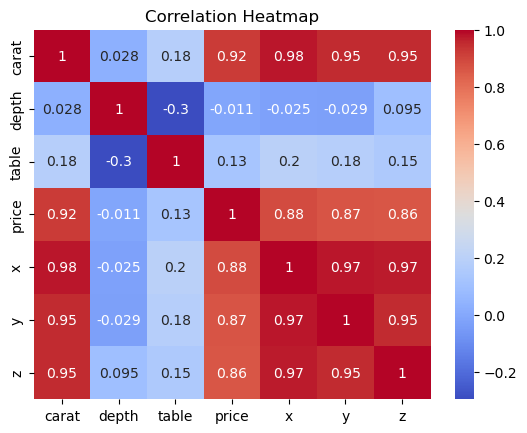

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Encoding

#### Converting Categorical data into numeric data

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [22]:
catcol = df.select_dtypes(object).columns
catcol

Index(['cut', 'color', 'clarity'], dtype='object')

In [23]:
df[catcol]=oe.fit_transform(df[catcol])

In [24]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,2.0,1.0,3.0,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3.0,1.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1.0,1.0,4.0,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3.0,5.0,5.0,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.0,6.0,3.0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2.0,0.0,2.0,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,1.0,0.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,4.0,0.0,2.0,62.8,60.0,2757,5.66,5.68,3.56


### Model Creation

In [25]:
x = df.drop(columns = ["price"],axis = 1)
y = df["price"]     

In [26]:
x  #Features

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
1,0.23,2.0,1.0,3.0,61.5,55.0,3.95,3.98,2.43
2,0.21,3.0,1.0,2.0,59.8,61.0,3.89,3.84,2.31
3,0.23,1.0,1.0,4.0,56.9,65.0,4.05,4.07,2.31
4,0.29,3.0,5.0,5.0,62.4,58.0,4.20,4.23,2.63
5,0.31,1.0,6.0,3.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53936,0.72,2.0,0.0,2.0,60.8,57.0,5.75,5.76,3.50
53937,0.72,1.0,0.0,2.0,63.1,55.0,5.69,5.75,3.61
53938,0.70,4.0,0.0,2.0,62.8,60.0,5.66,5.68,3.56


In [27]:
y  #Target

id
1         326
2         326
3         327
4         334
5         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53940, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [30]:
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Absolute Error: 858.7084697710088
Mean Squared Error: 1825912.9915253466
Root Mean Squared Error: 1351.2634796831248
R2 Score: 0.8851397433679633
